In [1]:
# Useful Modules
import torch
import torch.nn as nn


In [3]:
''' A simple Convolution, Batch Normalization, and Activation Class'''

class ConvBnAct(nn.Module):
    
    def __init__(self, n_in, # Input Channels
                 n_out, # Output Channels
                 kernel_size = 3, 
                 stride = 1, 
                 padding = 0, 
                 groups = 1, 
                 bn = True, # Batch Norm
                 act = True, # Activation
                 bias = False
                ):
        
        super(ConvBnAct, self).__init__()
        self.conv = nn.Conv2d(in_channels=n_in, 
                              out_channels=n_out, 
                              kernel_size=kernel_size, 
                              stride=stride, 
                              padding=padding, 
                              groups=groups, 
                              bias=bias
                             )
        self.batch_norm = nn.BatchNorm2d(num_features=n_out) if bn else nn.Identity()
        self.activation = nn.LeakyReLU() if act else nn.Identity()
        
    def forward(self, x):
        
        x = self.conv(x)
        x = self.batch_norm(x)
        x = self.activation(x)
        
        return x

In [6]:
model = ConvBnAct(3,64)
model

ConvBnAct(
  (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (batch_norm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (activation): LeakyReLU(negative_slope=0.01)
)

In [5]:
x = torch.randn(1,3,224,224)

In [8]:
model(x).shape

torch.Size([1, 64, 222, 222])

In [11]:
class DarkResidualBlock(nn.Module):
    
    def __init__(self, 
                 n_in, # Input Channels == Output Channels
                ):
        
        super(DarkResidualBlock, self).__init__()
        
        reduced_channels = int(n_in/2)
        
        self.conv1 = ConvBnAct(n_in, 
                               reduced_channels, 
                               kernel_size=1,
                               stride=1, 
                               padding=0, 
                               groups=1, 
                               bn=True, 
                               act=True
                              )
        self.conv2 = ConvBnAct(reduced_channels, 
                               n_in, 
                               kernel_size=3,
                               stride=1, 
                               padding=1, 
                               groups=1, 
                               bn=True, 
                               act=True
                              )
    def forward(self, x):
    
        identity = x
        
        out = self.conv1(x)
        out = self.conv2(out)
        
        out += identity
        
        return out
        

In [12]:
model = DarkResidualBlock(3)

DarkResidualBlock(
  (conv1): ConvBnAct(
    (conv): Conv2d(3, 1, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (batch_norm): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (activation): LeakyReLU(negative_slope=0.01)
  )
  (conv2): ConvBnAct(
    (conv): Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (batch_norm): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (activation): LeakyReLU(negative_slope=0.01)
  )
)

In [14]:
model(x).shape

torch.Size([1, 64, 222, 222])

In [1]:
# Imports PIL module
from PIL import Image

# open method used to open different extension image file
im = Image.open(r"Highway.jpg")
print(im)

# This method will show image in any image viewer
im.show()

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=612x398 at 0x1E52843EE80>


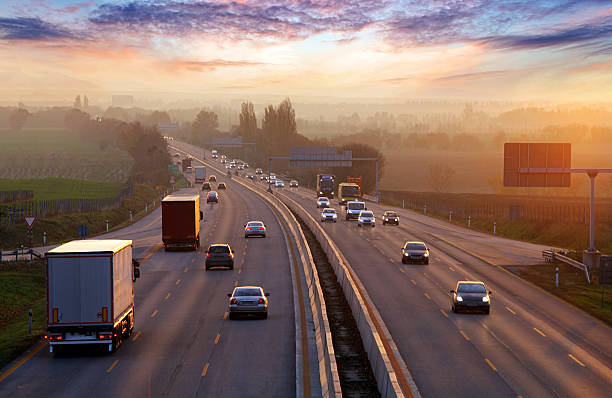

In [2]:
im

In [5]:

from PIL import Image
import numpy as np
img = Image. open('Highway.jpg')
img_rgb = img.convert('RGB')
img_array = np. array(img_rgb)
print(img), print(img_array. shape)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=612x398 at 0x1E5296742B0>
(398, 612, 3)


(None, None)

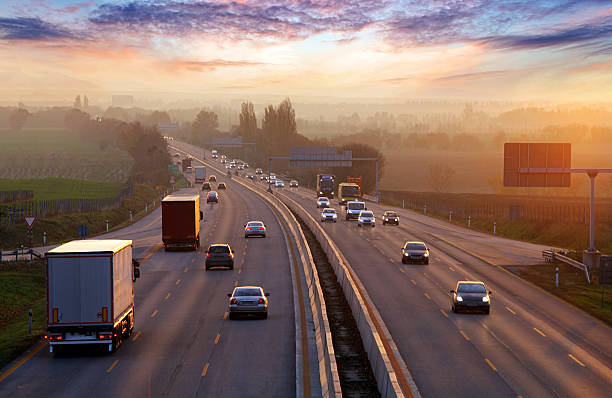

In [8]:
img_rgb

In [9]:
import os

# Specify the root directory
root_dir = "/"  # Use "C:\\" for Windows

# List only directories
folders = [f for f in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, f))]

print(folders)

['$Recycle.Bin', '$SysReset', '.Trash-0', 'Config.Msi', 'CuDNN', 'Data', 'Documents and Settings', 'edb', 'MinGW', 'OEM', 'OneDriveTemp', 'PerfLogs', 'Program Files', 'Program Files (x86)', 'ProgramData', 'Recovery', 'System Volume Information', 'Users', 'Windows']
